In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

По условию $N_t-N_s$ независима с $N_s$, поэтому

$E(N_t-N_s|N_s) = E(N_t|N_S) - N_s = E(N_t-N_s)$, откуда

$E(N_t|N_S) = E(N_t-N_s) + N_s$

Известно, что

$N_t-N_s \sim Pois(\frac{1}{\lambda}(t-s))$, следовательно

$E(N_t-N_s) = \frac{1}{\lambda}(t-s)$, значит, окончательно имеем:

$E(N_t|N_S) = \frac{1}{\lambda}(t-s) + N_s$

In [2]:
# Получаем данные из файла

with open("6.csv") as file:
    index = 0
    data = []
    for line in file:
        if index == 0:
            poissonLambda = int(line[9:])
        elif index == 1:
            t0 = int(line[5:])
        elif index == 2:
            t = int(line[4:])
        else:
            data.append(float(line))
        index += 1

In [3]:
N = 205 # 205 значений k можно взять, пока мы не превысим t
E = [1 / poissonLambda * (t - k * t0) + len([value for value in data if value <= k * t0]) for k in range(N)]

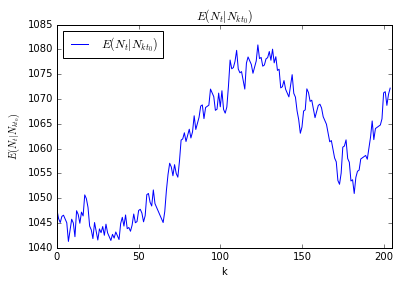

In [4]:
# Строим график

myFigure, myAxis = plt.subplots()
myAxis.plot (range(N), E, label=r"$E(N_t|N_{kt_0})$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("k")
myAxis.set_ylabel(r"$E(N_t|N_{kt_0})$")
myAxis.set_xlim(0, N)
myAxis.set_title(r"$E(N_t|N_{kt_0})$")

Бегает, прыгает, забавно. Казалось бы, в хорошем мире, при большом кол-ве данных точность должна возрастать, должны проявляться какие-нибудь закономерности, например может появляться стремление к какому-нибудь значению. Этого не видно =( Надо заметить, значений k мы имеем воможность взять не так уж и много, это можно считать объяснением.